# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [2]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

Перенесем написанные на контесте функции

In [4]:

def uniform(size=1, precision=30):
    return np.sum(sps.bernoulli.rvs(p = 0.5, size = np.prod(size) * precision).reshape(np.prod(size), precision) / 2**np.arange(1, precision + 1 , 1), axis=1).reshape(size)

def normal(size=1, loc=0, scale=1, precision=30):
    uniform1 = uniform(size, precision)
    uniform2 = uniform(size, precision)
    normal = np.cos(2 * np.pi * uniform1) * np.sqrt(-2 * np.log(uniform2))
    
    return loc + scale * normal 


def expon(size=1, lambd=1, precision=30):
    uniform_value = uniform(size, precision)
    return -np.log(1 - uniform_value) / lambd

Построим график плотности $U[0, 1]$ и гистограмму по сгенерированным случайным величинам

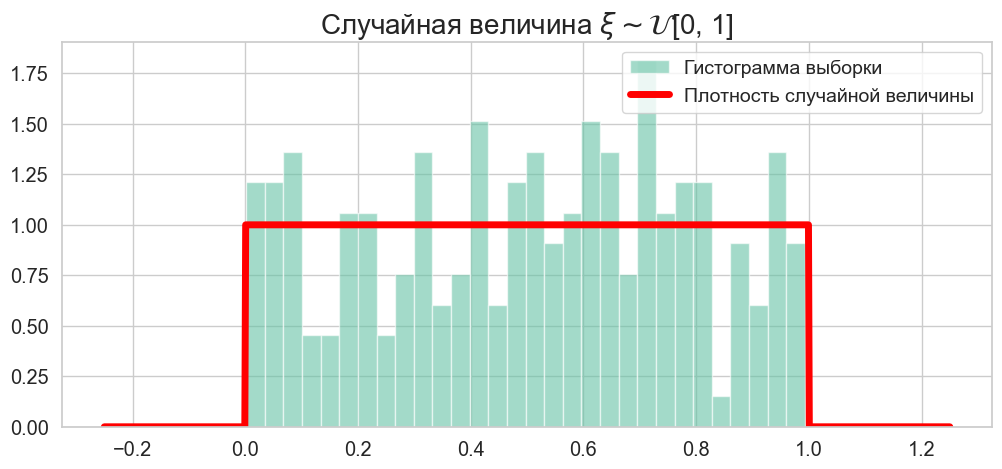

In [44]:
sample = uniform(size=200)
grid = np.linspace(-0.25, 1.25, 1000) 

plt.figure(figsize=(12, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.uniform.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{U}$[0, 1]', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

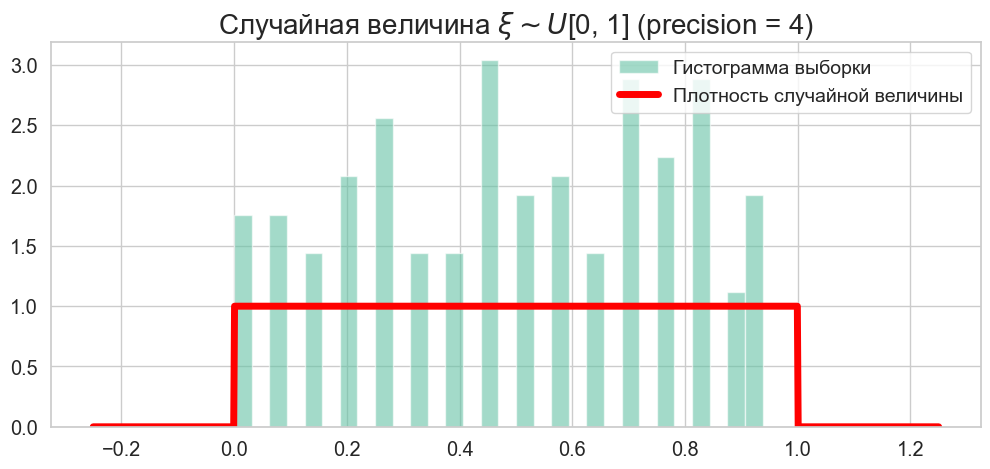

In [6]:
sample = uniform(size=200, precision=4)
grid = np.linspace(-0.25, 1.25, 1000) 

plt.figure(figsize=(12, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.uniform.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim U$[0, 1] (precision = 4)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Видно, что при достаточно маленьком precision достигаются не все значения случайной величины из-за чего есть пробелы в гистограмме.

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

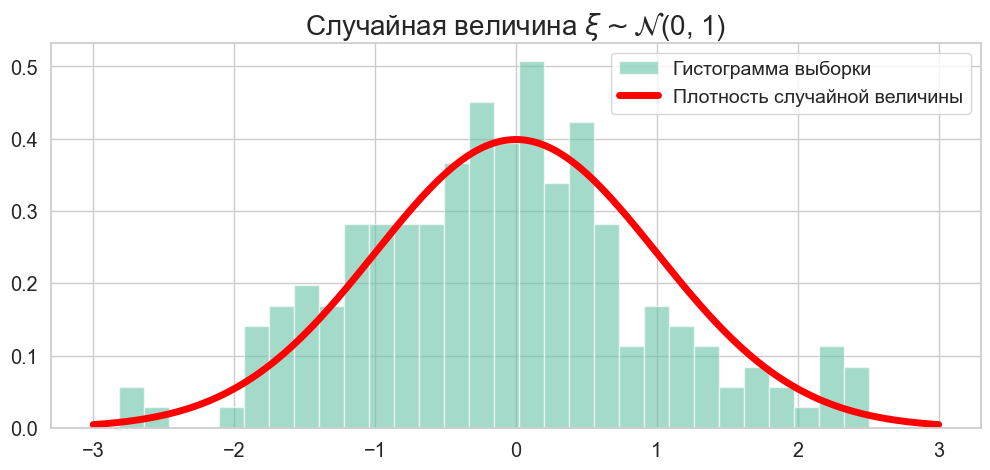

In [29]:
sample = normal(size=200)
grid = np.linspace(-3, 3, 1000) 

plt.figure(figsize=(12, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

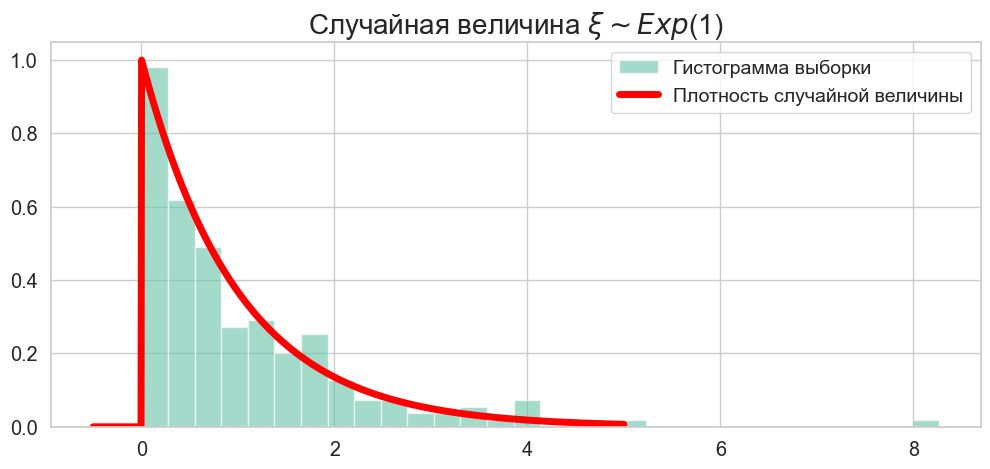

In [46]:
sample = expon(size=200)
grid = np.linspace(-0.5, 5, 1000) 

plt.figure(figsize=(12, 5))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, sps.expon.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Exp$(1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

**Выводы:**

Видно по графикам, что функции, написанные для абсолютно-непрерывных распределений с помощью бернуллиевского распределения, достаточо хорошо приближают эти самые непрерывные распределения. Это подтверждает, что метод генерации случайных величин из равномерного распределения с помощью двоичной записи случайных величин из бернуллиевского распределения действительно работает. 

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

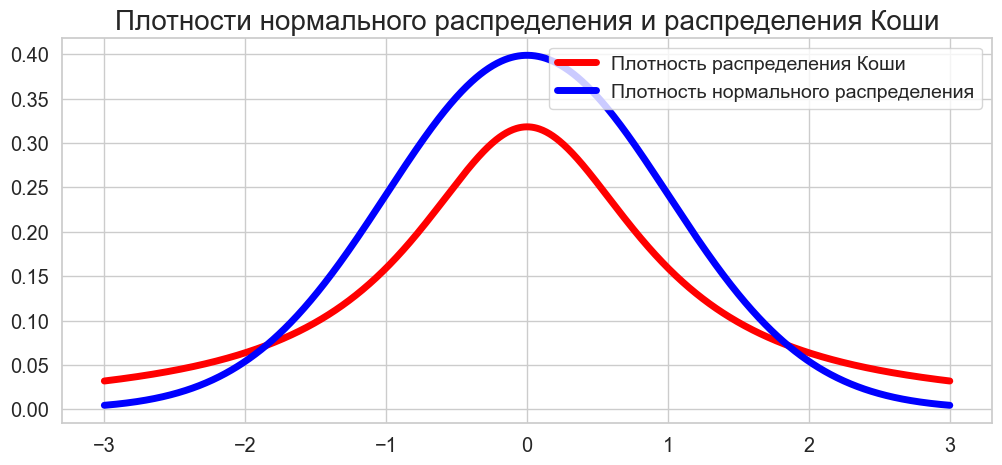

In [9]:
grid = np.linspace(-3, 3, 1000) 

plt.figure(figsize=(12, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color='red', 
         lw=5, label='Плотность распределения Коши')
plt.plot(grid, sps.norm.pdf(grid), color='blue', 
         lw=5, label='Плотность нормального распределения') 

plt.title(r'Плотности нормального распределения и распределения Коши', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Видно, что ближе к 0 плотность нормального распределения больше плотности распределения Коши, однако плотность нормального распределения быстрее стремится к 0 при x стремящемся $\infty$, чем плотность распределения Коши.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Проверим выполнение ЗБЧ. Для этого изобразим значение среднего в зависимости от количиства случайных величин. Проведем этот эксперимент 10 раз.

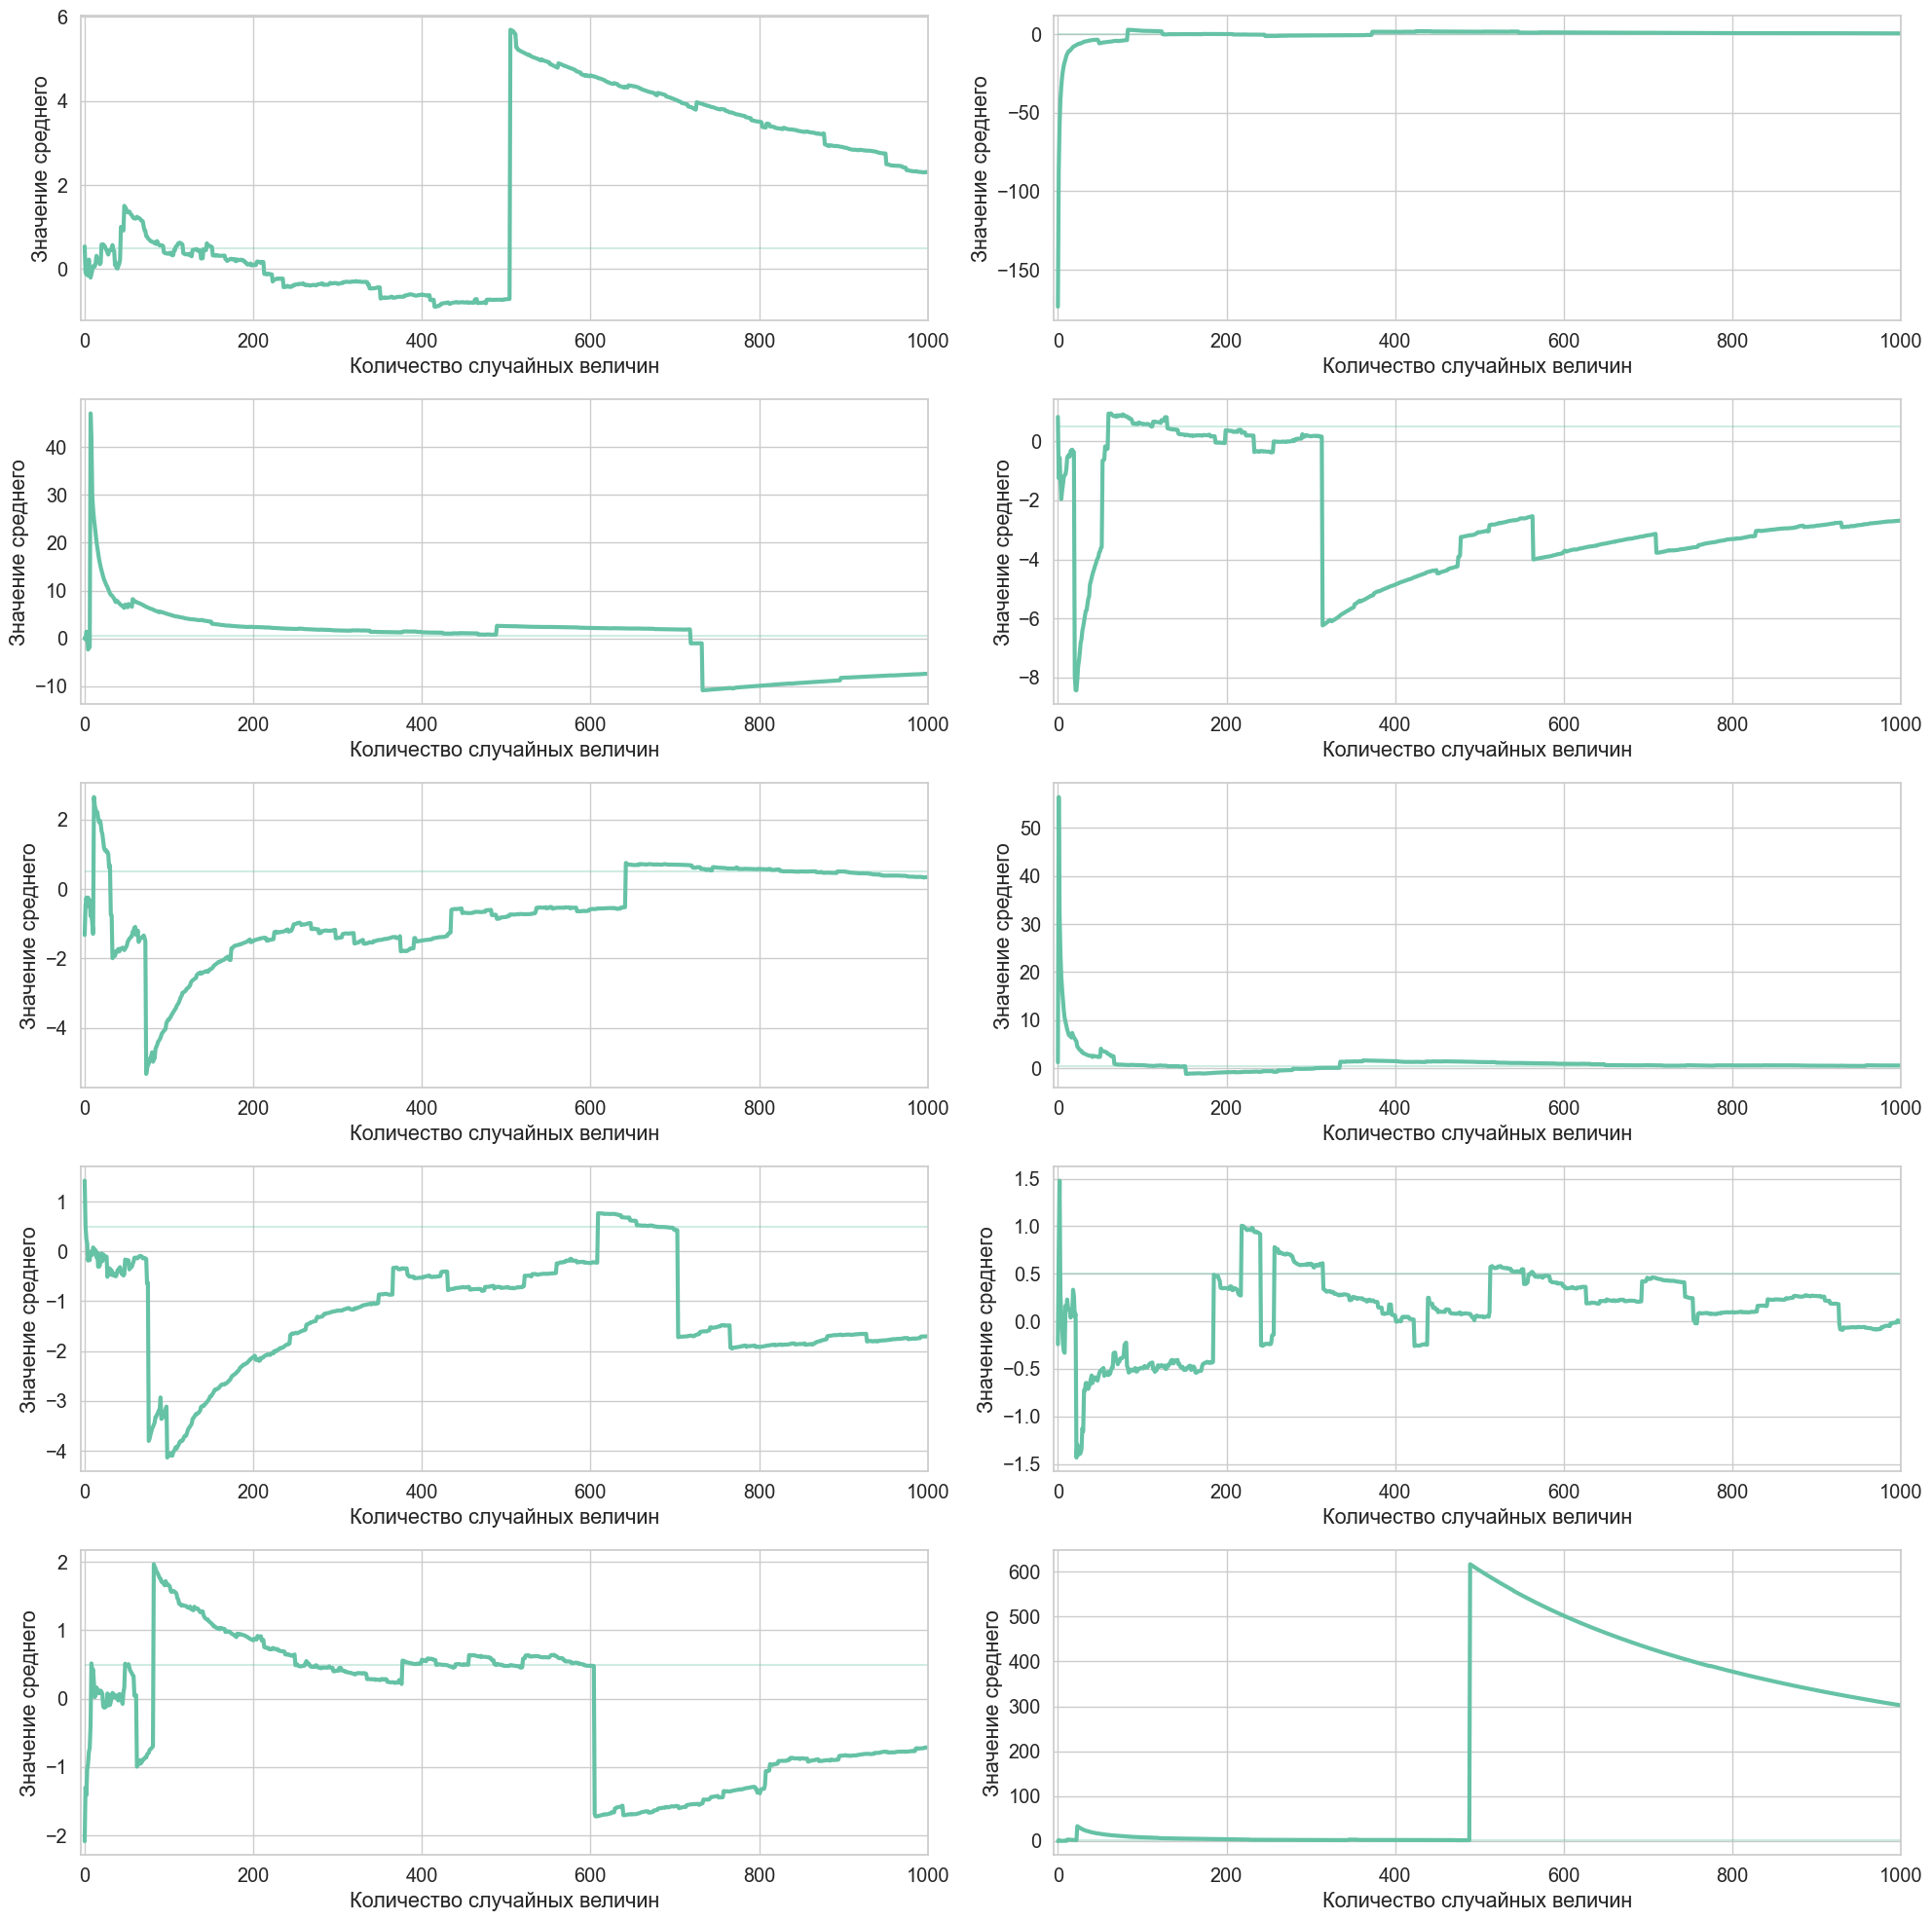

In [10]:
size = 1000
plt.figure(figsize=(20, 20))
# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    # График
    plt.subplot(5, 2, i + 1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((-5, size))
plt.tight_layout()

Сгенерируем большое количество независимых наборов случайных величин и изобразим их на одном графике.

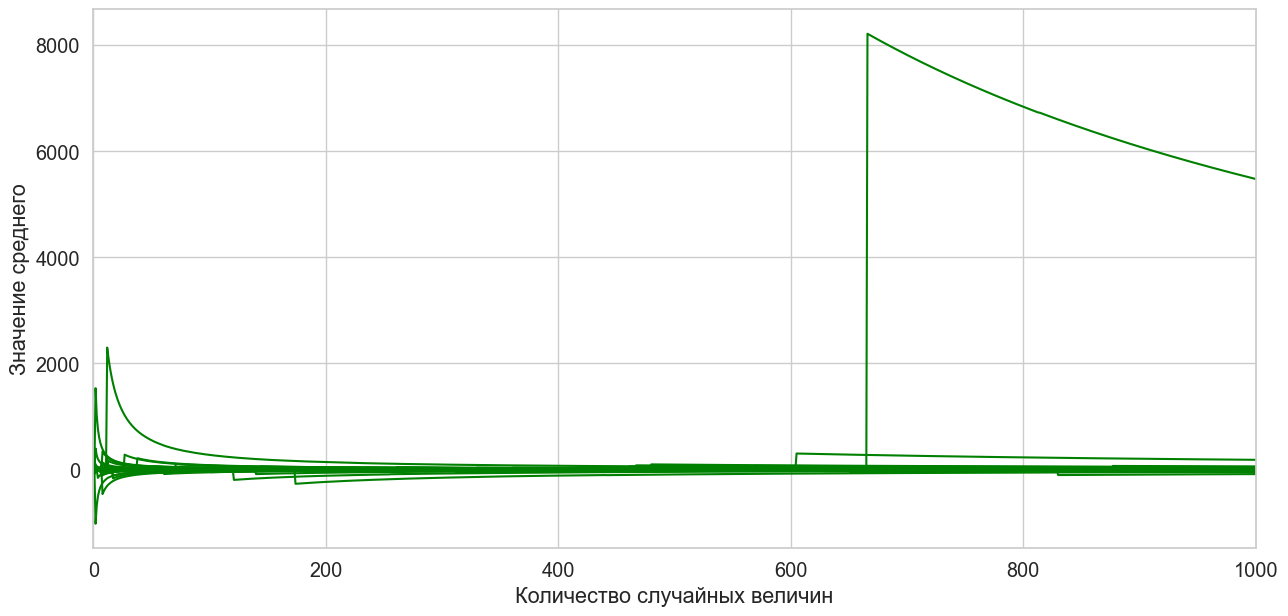

In [11]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy().rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green")

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size))
plt.show()

Из эксперимента видно, что ЗБЧ не выполняется для распределения Коши, так как не видно к чему стремится значение среднего при большом количестве случайных величин. Это и подтверждает свойство не существования матожидания у распределения Коши. 

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

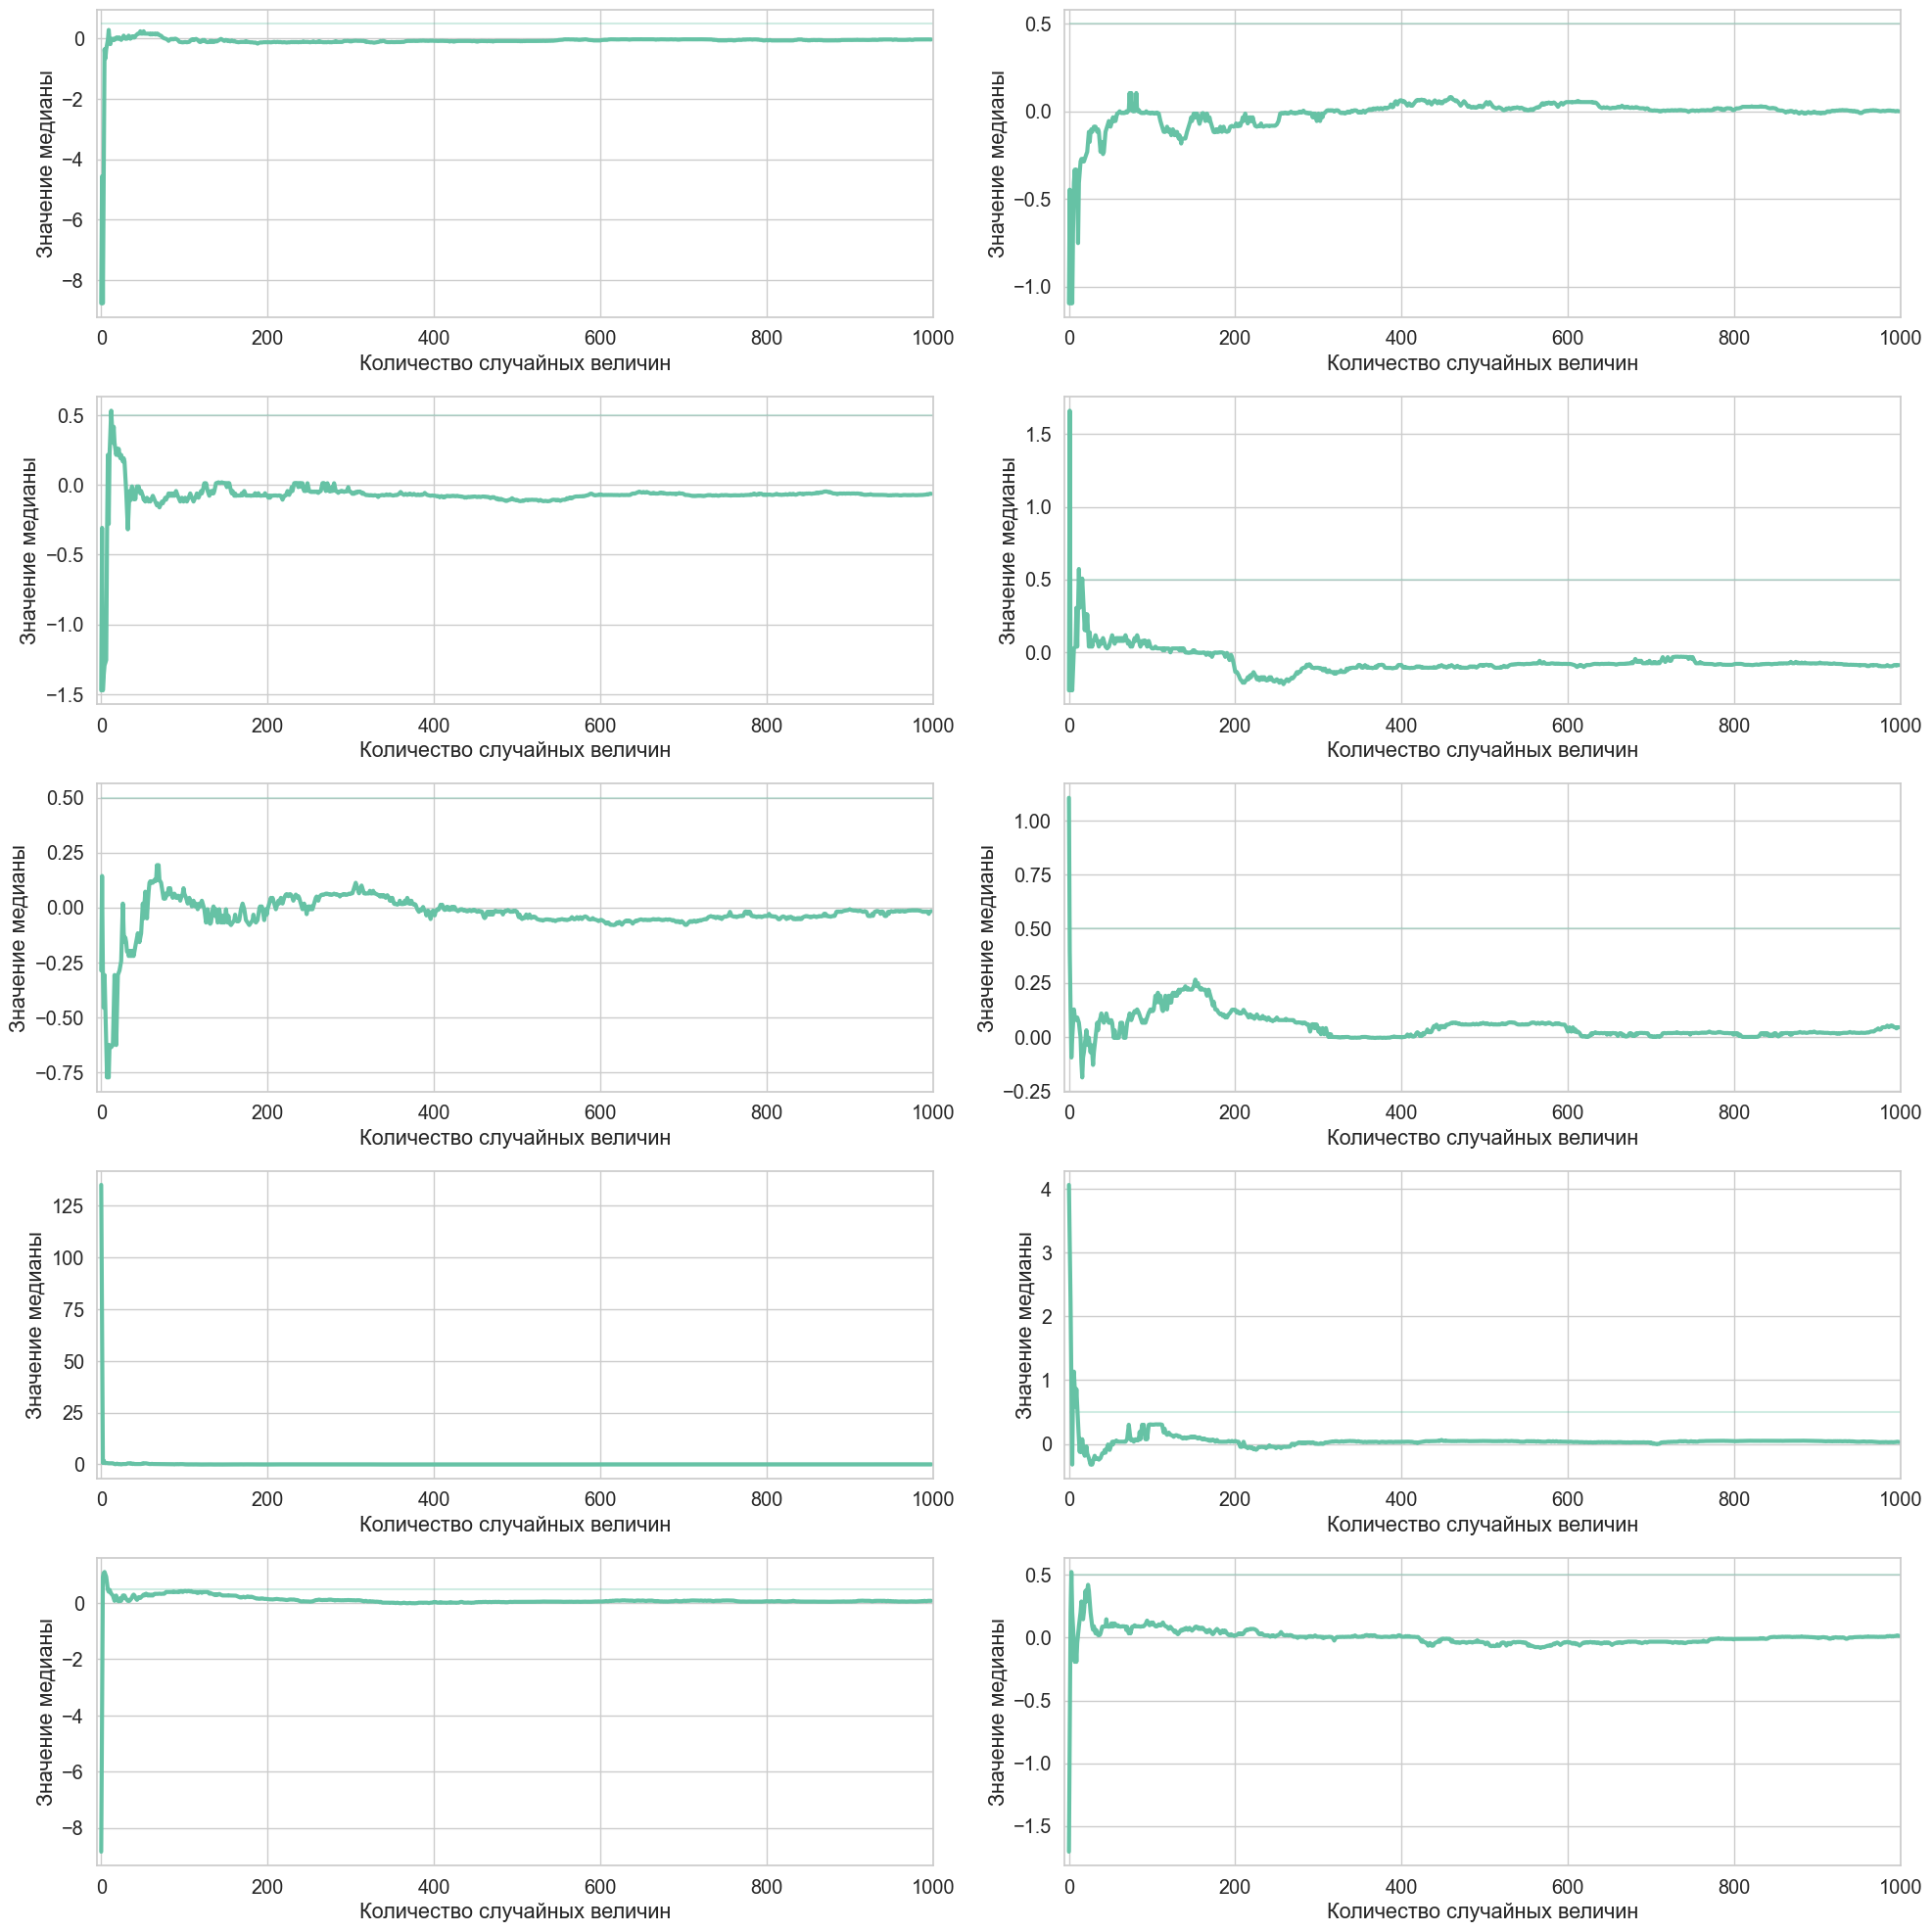

In [12]:
size = 1000
plt.figure(figsize=(20, 20))
# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_medians = [np.median(samples[:i+1]) for i in range(len(samples) - 1)]

    # График
    plt.subplot(5, 2, i + 1)
    plt.plot(cum_medians, lw=3)
    plt.hlines(0.5, 0, size, alpha=0.3)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение медианы")
    plt.xlim((-5, size))

plt.tight_layout()

Изобразим также набор случайных величин и их медианы на одном графике

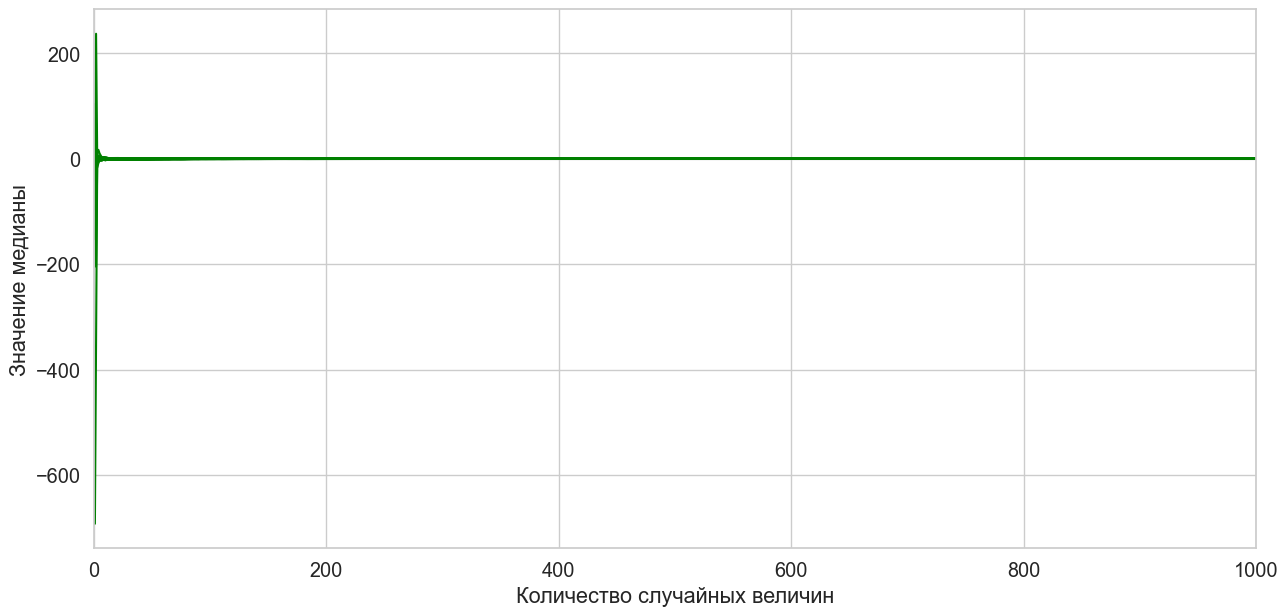

In [13]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    samples = sps.cauchy().rvs(size=(size))
    cum_medians = [np.median(samples[:i+1]) for i in range(len(samples))]
    plt.plot(np.arange(size) + 1, cum_medians, color="green")

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение медианы")
plt.xlim((0, size))
plt.show()

По графикам видно, что медиана у распределения Коши стремится к 0.

**Вывод:**

Сравнивая нормальное распределения и распределение Коши мы поняли их различия. Также проведя эксперименты с ЗБЧ для распределения Коши можно убедиться в свойстве не существования матожидания у этого распределения. Однако проведя аналогичный эксперимент с медианой мы получили, что медиана распределения Коши стремится к 0.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

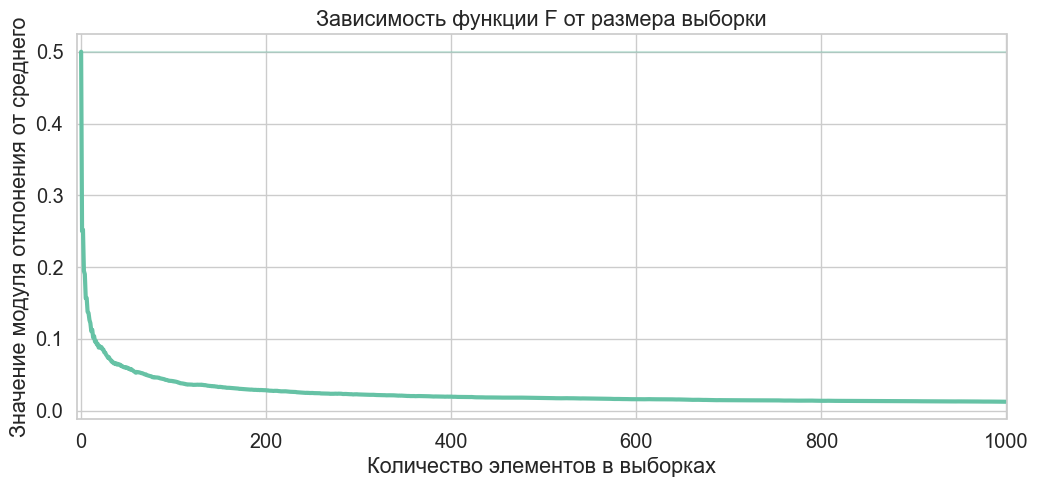

In [14]:
samples_count = 500
size = 1000
samples = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

F_array = np.sum(np.abs(cum_means - 0.5), axis = 0) / samples_count
plt.figure(figsize=(12, 5))
plt.plot(F_array, lw=3)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel("Количество элементов в выборках")
plt.ylabel("Значение модуля отклонения от среднего")
plt.xlim((-5, size))
plt.title('Зависимость функции F от размера выборки')
plt.show()


Визуализируем зависимость в логарифмическом масштабе.

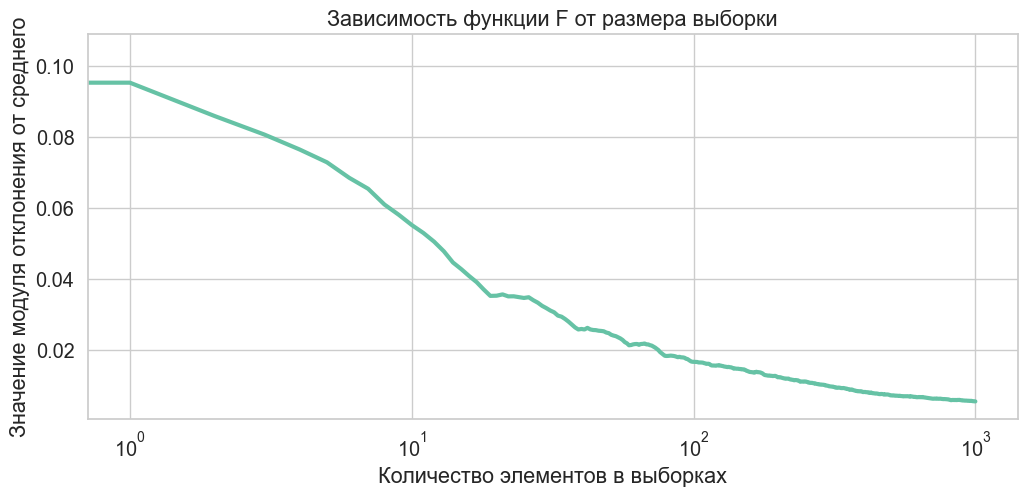

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(F_array, lw=3)
plt.xlabel("Количество элементов в выборках")
plt.ylabel("Значение модуля отклонения от среднего")
plt.xscale('log')
plt.title('Зависимость функции F от размера выборки')
plt.show()

Выведем минимальное значение n при котором F(n) $\leq$ 0.02

In [16]:
indices = np.where(F_array <= 0.02)
print(np.min(indices))

361


**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

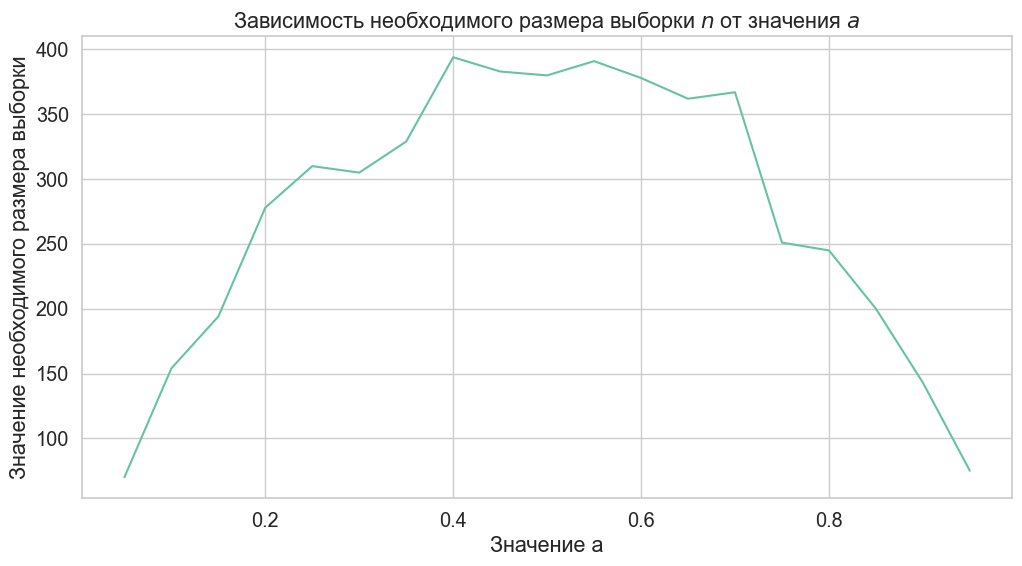

In [17]:
plt.figure(figsize=(12, 6))
result = np.arange(19)
for a, i in zip(np.arange(0.05, 1, 0.05), np.arange(19)):
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

    F_array = np.sum(np.abs(cum_means - a), axis = 0) / samples_count
    result[i] = np.min(np.where(F_array <= 0.02))

plt.plot(np.arange(0.05, 1, 0.05), result)
plt.xlabel("Значение a")
plt.ylabel("Значение необходимого размера выборки")
plt.title('Зависимость необходимого размера выборки $n$ от значения $a$')
plt.show()

**Выводы:**

По графику функции среднего значения модуля отклонения от среднего видно, что оно действительно стремится к 0 при росте количества элементов в выборке. Также по графику зависимости минимального значения размера выборки от значения a видно, что при a близких к 0,5 нужно больше элементов выборки для того, чтобы функция отклонения была достаточно мала, чем для a близких к 0 или 1. Это связано с тем, что при значении a близких к 0 или 1 в случайной величине преобладают одни и те же числа(0 или 1 соответственно).